In [1]:
from __future__ import absolute_import, print_function, unicode_literals
import sys
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import analysis as a
from IPython.display import display, HTML
sys.path.append('/home/janekg89/Develop/Pycharm_Projects/flutype_webapp')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "flutype_webapp.settings")
import django
django.setup()
from flutype.models import Spot


****************************************
RUNNING IN DEVELOP
****************************************


In [2]:
 raw_spot_collections = ["2018-01-24_E14_X31",
                         "2018-01-24_E15_X31",
                         "2018-01-24_N21_Pan",
                         "2018-01-24_N22_Cal",
                         "2018-01-24_N23_X31",
                         ]
spots = Spot.objects.filter(raw_spot__raw_spot_collection__sid__in=raw_spot_collections)
spots = spots.filter(spot_collection__sid="quant1")

#studies = ["2018-01-24_microarray"]
#spots = Spot.objects.filter(raw_spot__raw_spot_collection__studies__sid__in=studies)

In [3]:
#spots = spots.exclude(raw_spot__lig_fix_batch__sid__in = ['P016','Dye001','pep61'])


In [4]:
data = a.Data(spots)
spots_pd = data._reformat(spots)
spots_pd.dropna(inplace = True)
spots_pd = data._add_replica_row(spots_pd)
data_class = data._pivot_table(spots_pd)
data.data = data_class
data.data

Ligand Batch                                    0.25_pep11  0.25_pep12  \
Analyte Batch Collection         Block Replica                           
Cal           2018-01-24_N22_Cal 1     1          6.694299    5.874826   
                                       2          3.223466    3.022266   
                                       3          5.648507    4.090531   
                                 2     1          3.689081    3.490149   
                                       2          4.844226    3.706434   
                                       3          3.742624    4.738139   
                                 3     1          3.267516    4.116075   
                                       2          5.356561    3.706434   
                                       3          7.636020    3.103988   
Pan           2018-01-24_N21_Pan 1     1         15.538905   12.591246   
                                       2         19.231493    7.518733   
                                       3         11.070045    9.055270   
                                 2     1         16.768688   14.551443   
                                       2         25.120995   11.312962   
                                       3         11.545274    9.434428   
                                 3     1         20.474826    9.224206   
                                       2         22.607363    9.275245   
                                       3         17.319204   14.029503   
X31A          2018-01-24_E14_X31 1     1          6.145672    2.312040   
                                       2          4.417476    8.031855   
                                       3         11.202977    6.537512   
                                 2     1          9.673433    6.609552   
                                       2         10.587264    6.384066   
                                       3         10.059911    6.775513   
                                 3     1          8.556219    6.647396   
                                       2          6.181504    3.444946   
                                       3          4.446980    5.802205   
              2018-01-24_E15_X31 1     1          8.369593    5.926697   
                                       2         11.712523    7.208668   
                                       3          6.758371    6.130823   
                                 2     1          8.659502    8.560982   
                                       2         14.674027    7.250797   
                                       3          7.530548    5.259367   
                                 3     1          7.302289    8.321592   
                                       2         25.537711    9.557665   
                                       3         13.565970   10.213731   
              2018-01-24_N23_X31 1     1         31.040280   46.404525   
                                       2         14.169412   11.252336   
                                       3         15.339104   11.934836   
                                 2     1         16.415323   13.327562   
                                       2         22.385272   11.294527   
                                       3         18.134129   13.287964   
                                 3     1         16.251832   13.132261   
                                       2         21.026717   12.791849   
                                       3         22.722172   34.577512   

Ligand Batch                                    0.25_pep13  0.25_pep14  \
Analyte Batch Collection         Block Replica                           
Cal           2018-01-24_N22_Cal 1     1          1.918680    4.403243   
                                       2          2.647032    3.072239   
                                       3          2.412139    2.526697   
                                 2     1          2.743531    2.214527   
                                       2          4.101095    4.449050   
   

# 1. Basic Approach
## No mean. Permutation within block.

In [5]:
data = a.Data(spots)
spots_pd = data._reformat(spots)
spots_pd.dropna(inplace = True)
spots_pd = data._add_replica_row(spots_pd)
data_class = data._pivot_table(spots_pd)
data.data = data_class
analysis = a.Analysis(data=data)
performance_tabels = []
for _ in range(20):
    data._safe_random_permutation(data.data, with_in="Block")
    analysis = a.Analysis(data=data)
    
    performance_tabels += tuple((analysis.performance_table(),))
df = pd.concat(performance_tabels,axis=0)
    

/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/

/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/

In [6]:
performace_mean = df.groupby(df.index).mean()    
performace_mean["Name"] = performance_tabels[0]["Name"]
performace_mean

,unweighted accuracy,true positive,false positive,true negative,false negative,Name
0,77.000000,77.000000,23.000000,88.500000,11.500000,Nearest Neighbors
1,50.333333,71.379673,28.620327,85.297234,14.702766,Decision Tree
2,78.666667,87.063793,12.936207,92.670259,7.329741,Random Forest
3,59.666667,75.469625,24.530375,87.842283,12.157717,AdaBoost
4,82.333333,93.055986,6.944014,92.900454,7.099546,Naive Bayes
5,53.000000,65.810543,34.189457,87.042839,12.957161,LDA


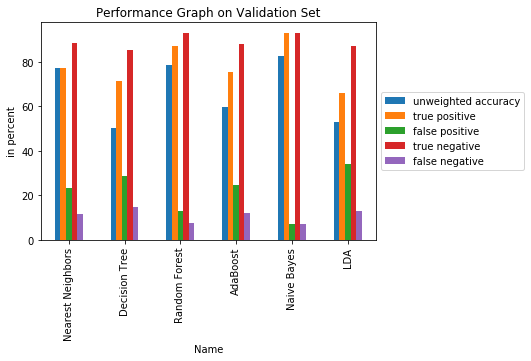

In [7]:
performace_mean.plot.bar("Name")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Performance Graph on Validation Set')
plt.ylabel('in percent')
#plt.savefig('performance_validators_on_unprocest_shuffeld_data.png',bbox_inches='tight')
plt.show()

# 2. Mean Block Approach
## Mean on block. Permutation within microarray.

In [17]:
data = a.Data(spots,mean_on="Block")


[u'Analyte Batch', u'Collection', u'Block']


In [18]:
performance_tabels = []
for _ in range(20):
    analysis = a.Analysis(data=data)
    performance_tabels += tuple((analysis.performance_table(),))
    data._safe_random_permutation(data.data, with_in="Collection")


df = pd.concat(performance_tabels,axis=0)

/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/

/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/

In [19]:
performace_mean = df.groupby(df.index).mean()    
performace_mean["Name"] = performance_tabels[0]["Name"]
performace_mean

,unweighted accuracy,true positive,false positive,true negative,false negative,Name
0,90.000000,90.000000,10.000000,95.000000,5.000000,Nearest Neighbors
1,55.000000,69.583333,30.416667,81.666667,18.333333,Decision Tree
2,88.333333,90.833333,9.166667,99.166667,0.833333,Random Forest
3,73.333333,84.666667,15.333333,92.404762,7.595238,AdaBoost
4,0.000000,NaN,NaN,66.666667,33.333333,Naive Bayes
5,55.000000,85.000000,15.000000,84.178571,15.821429,LDA


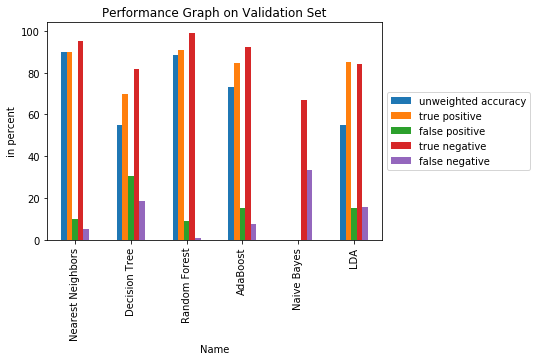

In [20]:
performace_mean.plot.bar("Name")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Performance Graph on Validation Set')
plt.ylabel('in percent')
#plt.savefig('performance_validators_on_unprocest_shuffeld_data.png',bbox_inches='tight')
plt.show()